## Библиотеки

In [1]:
import os

import dataset.classify_dataset as class_ds
import dataset.default_augmentations as def_augs
import dataset.test_dataset as test_cl_ds

In [2]:
datasets_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data'
train_ds_path = os.path.join(datasets_path, 'sampled_train_marks_models')
test_ds_path = os.path.join(datasets_path, 'sampled_test')

In [3]:
def marks_indx_f(x):
    return (x[0],)


def models_indx_f(x):
    return (x[0], x[1])

## 1. Модель классификации

In [4]:
classif_ds_train = class_ds.TLClassifyDataset(
    train_ds_path, marks_indx_f, crop=False,
    transform=def_augs.clTL_train_augs_128
)

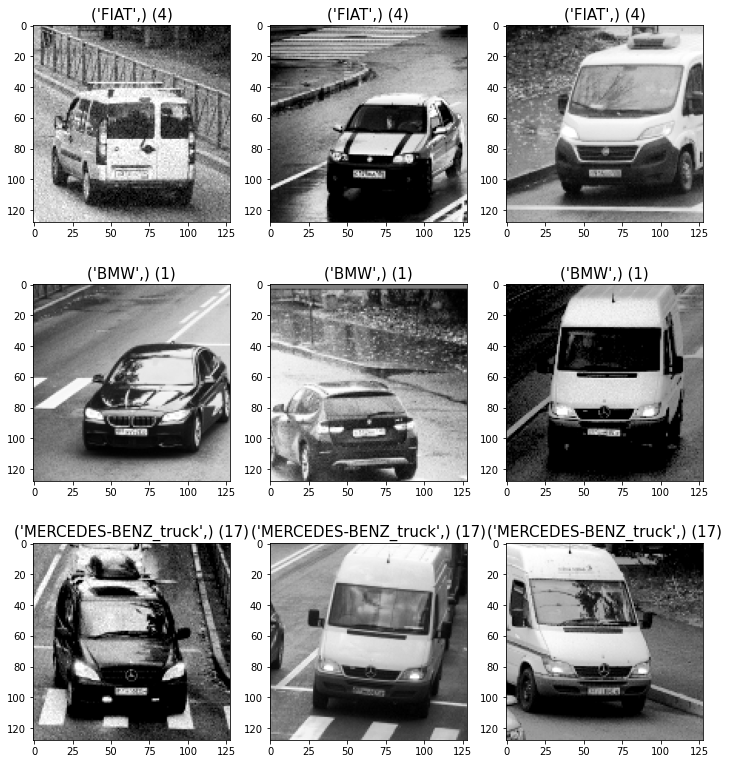

In [5]:
test_cl_ds.classify_ds_test(classif_ds_train, n=3,
                            lines_span=1.5, figsize_sq=3)